In [295]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import classification_report,f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix

from sklearn.linear_model import LogisticRegression

Scenario: EcomX Retailers is a mid-sized online retail company specializing in electronics, clothing, and home goods. The company has been growing steadily over the past few years and wants to optimize its marketing and customer retention strategies. One key aspect of this strategy is to understand the Customer Lifetime Value (CLV) of its customers. By predicting the CLV, EcomX aims to identify high-value customers and tailor personalized marketing efforts to retain them, while also identifying low-value customers to manage resources effectively.

Objective: The objective of this assignment is to build and evaluate a machine learning model to predict the Customer Lifetime Value (CLV) of EcomX’s customers. You will need to identify and apply various data cleaning and preparation techniques, as well as select an appropriate model and evaluation criteria.

In [296]:
customer = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagement = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

Data Cleaning (Missing Values)

In [297]:
customer.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [298]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [299]:
customer.describe()

,customer_id,age
count,10000.00000,8991.000000
mean,5000.50000,43.467467
std,2886.89568,15.094380
min,1.00000,18.000000
25%,2500.75000,30.000000
50%,5000.50000,44.000000
75%,7500.25000,57.000000
max,10000.00000,69.000000


In [300]:
#fill out missing value to customer's age column with the age mean
customer['age']= customer['age'].fillna(customer['age'].mean())

In [301]:
#change the data type from float to int
customer['age']= customer['age'].astype(int)

In [302]:
#check if missing values are gone
customer.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,43,Male,Hillville
2,3,2021-06-01,2022-11-27,43,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29,Male,Grossstad
4,5,2022-01-24,2023-06-02,43,Male,East Matthewfort


In [303]:
#fill out missing data under gender column
#N/A is defined as Other
def gender_type(x):
    if x == 'Female':
        return 'Female'
    elif x == 'Male':
        return 'Male'
    else:
        return 'Other'

customer['gender'] = customer['gender'].apply(gender_type)

In [304]:
#check if all missing data are gone
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         10000 non-null  int64 
 1   join_date           10000 non-null  object
 2   last_purchase_date  10000 non-null  object
 3   age                 10000 non-null  int32 
 4   gender              10000 non-null  object
 5   location            10000 non-null  object
dtypes: int32(1), int64(1), object(4)
memory usage: 429.8+ KB


In [305]:
engagement.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [306]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [307]:
engagement.describe()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,100.111900,39.862100,19.725300
std,2886.89568,118.625052,46.511719,22.975083
min,1.00000,1.000000,1.000000,1.000000
25%,2500.75000,15.000000,6.000000,3.000000
50%,5000.50000,53.000000,22.000000,11.000000
75%,7500.25000,141.000000,57.000000,28.000000
max,10000.00000,711.000000,303.000000,142.000000


In [308]:
#investigat if there exist outlier
engagement[engagement['number_of_site_visits'] == 711]

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
4052,4053,711,17,1


In [309]:
marketing.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [310]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     25200 non-null  int64 
 1   customer_id     25200 non-null  int64 
 2   response        25200 non-null  object
 3   promotion_type  25200 non-null  object
 4   campaign_date   25200 non-null  object
dtypes: int64(2), object(3)
memory usage: 984.5+ KB


In [311]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [312]:
transactions[transactions['customer_id'] ==1]

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics
5,6,1,2024-01-09,174.72,Clothing


In [313]:
customer['join_date'] = pd.to_datetime(customer['join_date'])
customer['last_purchase_date'] = pd.to_datetime(customer['last_purchase_date'])
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
marketing['campaign_date'] = pd.to_datetime(marketing['campaign_date'])

Join Tables

In [314]:
# split at customer level with # of marketing campaigns customer responded YES and No
# step 1: marketing data at a customer level

marketing_agg_yes = marketing[marketing['response']=='Yes'].groupby('customer_id')['campaign_id'].count().to_frame()

In [315]:
# step 2: aggregate transaction data at a customer level
transactions_agg = transactions.groupby('customer_id').aggregate({'transaction_id':'count','transaction_amount':'sum'})

In [316]:
# step 3: set customers and engagement index as customer_id
customer.set_index('customer_id', inplace=True)
engagement.set_index('customer_id', inplace=True)

In [317]:
# step 4: join all tables
joint_data_yes = customer.join(engagement).join(transactions_agg).join(marketing_agg_yes)

In [318]:
# now have a customer level data set;  you will see some NaN values under campaign_id because some customers haven't been targeted with any marketing campaigns
joint_data_yes

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id
customer_id,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,1.0
2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,2.0
3,2021-06-01,2022-11-27,43,Other,North Latoyatown,192,73,25,6,1454.87,1.0
4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,1.0
5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,NaN
9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,1.0
9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,1.0


In [319]:
joint_data_yes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   join_date                10000 non-null  datetime64[ns]
 1   last_purchase_date       10000 non-null  datetime64[ns]
 2   age                      10000 non-null  int32         
 3   gender                   10000 non-null  object        
 4   location                 10000 non-null  object        
 5   number_of_site_visits    10000 non-null  int64         
 6   number_of_emails_opened  10000 non-null  int64         
 7   number_of_clicks         10000 non-null  int64         
 8   transaction_id           10000 non-null  int64         
 9   transaction_amount       10000 non-null  float64       
 10  campaign_id              7665 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int32(1), int64(4), object(2)
memory usage: 1.1+ MB


In [320]:
#set missing campaign id as 0 to mark the customer who are not target for campaign
joint_data_yes['campaign_id']= joint_data_yes['campaign_id'].fillna(0)
joint_data_yes

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id
customer_id,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,1.0
2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,2.0
3,2021-06-01,2022-11-27,43,Other,North Latoyatown,192,73,25,6,1454.87,1.0
4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,1.0
5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,0.0
9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,1.0
9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,1.0


In [321]:
joint_data_yes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   join_date                10000 non-null  datetime64[ns]
 1   last_purchase_date       10000 non-null  datetime64[ns]
 2   age                      10000 non-null  int32         
 3   gender                   10000 non-null  object        
 4   location                 10000 non-null  object        
 5   number_of_site_visits    10000 non-null  int64         
 6   number_of_emails_opened  10000 non-null  int64         
 7   number_of_clicks         10000 non-null  int64         
 8   transaction_id           10000 non-null  int64         
 9   transaction_amount       10000 non-null  float64       
 10  campaign_id              10000 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int32(1), int64(4), object(2)
memory usage: 1.1+ MB


Feature engineering

<Axes: xlabel='transaction_amount', ylabel='Count'>

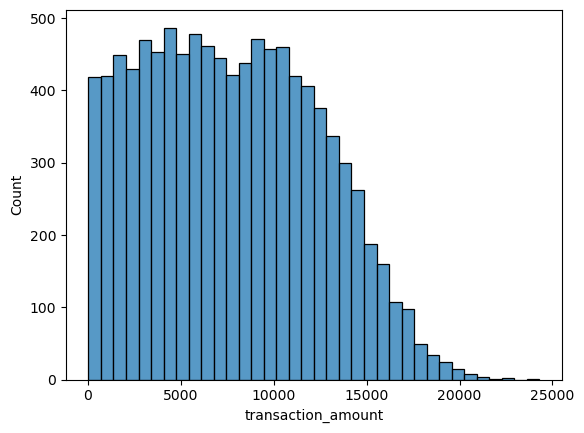

In [322]:
sns.histplot(joint_data_yes['transaction_amount'])

<Axes: xlabel='campaign_id', ylabel='Count'>

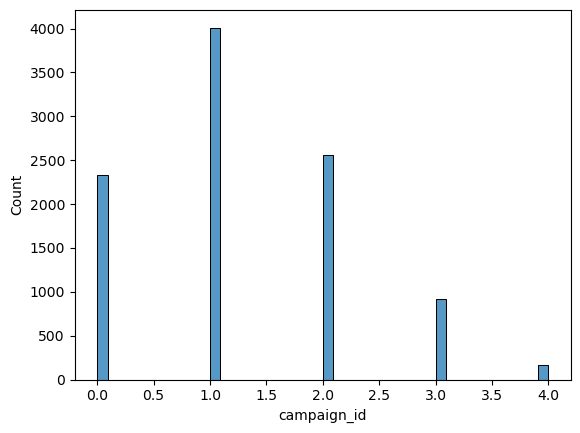

In [323]:
sns.histplot(joint_data_yes['campaign_id'])

In [324]:
#create a new column named 'average_purchase_value'
joint_data_yes['avg_purchase_per_transaction'] = joint_data_yes['transaction_amount']/joint_data_yes['transaction_id']
joint_data_yes

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction
customer_id,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,Female,North Shannonbury,10,15,1,6,3509.48,1.0,584.913333
2,2021-09-08,2023-10-25,43,Male,Hillville,285,49,51,9,6081.32,2.0,675.702222
3,2021-06-01,2022-11-27,43,Other,North Latoyatown,192,73,25,6,1454.87,1.0,242.478333
4,2022-01-01,2022-09-01,29,Male,Grossstad,110,30,17,20,7874.68,1.0,393.734000
5,2022-01-24,2023-06-02,43,Male,East Matthewfort,161,2,7,24,15524.55,0.0,646.856250
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42,Female,Johnstonborough,119,47,16,10,5498.20,0.0,549.820000
9997,2022-07-09,2023-01-25,26,Male,Jessicamouth,3,33,14,12,5848.30,1.0,487.358333
9998,2023-09-17,2024-01-30,39,Male,New John,53,17,5,3,3503.13,1.0,1167.710000


In [325]:
#create column 'customer_lifespan' in months
joint_data_yes['customer_lifespan'] = ((joint_data_yes['last_purchase_date'] - joint_data_yes['join_date']).dt.days / 365).round(2)
#joint_data_yes['customer_lifetime'] = joint_data_yes['last_purchase_date'] - joint_data_yes['join_date']
#joint_data_yes['customer_lifetime'] = joint_data_yes['customer_lifetime']/pd.Timedelta('30 days')

<Axes: xlabel='customer_lifespan', ylabel='Count'>

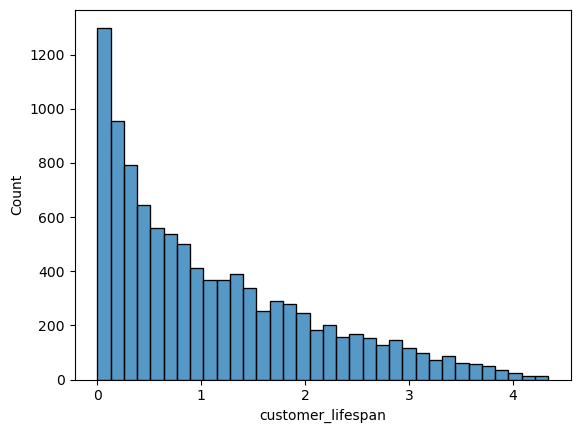

In [326]:
sns.histplot(joint_data_yes['customer_lifespan'])

In [327]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

#label encode categorical data
le = LabelEncoder()
joint_data_yes['gender']=le.fit_transform(joint_data_yes['gender'])
joint_data_yes['location']=le.fit_transform(joint_data_yes['location'])
joint_data_yes

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan
customer_id,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,0,4747,10,15,1,6,3509.48,1.0,584.913333,0.32
2,2021-09-08,2023-10-25,43,1,2074,285,49,51,9,6081.32,2.0,675.702222,2.13
3,2021-06-01,2022-11-27,43,2,4613,192,73,25,6,1454.87,1.0,242.478333,1.49
4,2022-01-01,2022-09-01,29,1,1916,110,30,17,20,7874.68,1.0,393.734000,0.67
5,2022-01-24,2023-06-02,43,1,1433,161,2,7,24,15524.55,0.0,646.856250,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42,0,2384,119,47,16,10,5498.20,0.0,549.820000,0.66
9997,2022-07-09,2023-01-25,26,1,2315,3,33,14,12,5848.30,1.0,487.358333,0.55
9998,2023-09-17,2024-01-30,39,1,4017,53,17,5,3,3503.13,1.0,1167.710000,0.37


In [328]:
#check if there is zero value in customer_lifespan
joint_data_yes[joint_data_yes['customer_lifespan'] == 0]

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan
customer_id,,,,,,,,,,,,,
354,2024-05-29,2024-05-29,30,0,3456,1,1,1,11,7567.83,1.0,687.984545,0.0
424,2021-06-02,2021-06-02,25,0,509,1,1,1,15,8869.24,2.0,591.282667,0.0
570,2024-03-23,2024-03-23,43,1,7360,1,1,1,18,12306.07,0.0,683.670556,0.0
846,2024-05-01,2024-05-02,52,1,5486,1,1,1,24,15395.06,2.0,641.460833,0.0
923,2023-12-30,2023-12-31,22,0,4621,1,1,1,4,4668.87,0.0,1167.217500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,2024-05-31,2024-05-31,59,0,5153,1,1,1,22,13658.06,0.0,620.820909,0.0
9236,2024-04-21,2024-04-22,26,0,5376,1,1,1,14,8384.90,2.0,598.921429,0.0
9655,2024-03-23,2024-03-23,53,1,1671,1,1,1,2,1129.68,1.0,564.840000,0.0


In [329]:
df1 = joint_data_yes[joint_data_yes['customer_lifespan'] != 0]

In [330]:
df1

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan
customer_id,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,0,4747,10,15,1,6,3509.48,1.0,584.913333,0.32
2,2021-09-08,2023-10-25,43,1,2074,285,49,51,9,6081.32,2.0,675.702222,2.13
3,2021-06-01,2022-11-27,43,2,4613,192,73,25,6,1454.87,1.0,242.478333,1.49
4,2022-01-01,2022-09-01,29,1,1916,110,30,17,20,7874.68,1.0,393.734000,0.67
5,2022-01-24,2023-06-02,43,1,1433,161,2,7,24,15524.55,0.0,646.856250,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42,0,2384,119,47,16,10,5498.20,0.0,549.820000,0.66
9997,2022-07-09,2023-01-25,26,1,2315,3,33,14,12,5848.30,1.0,487.358333,0.55
9998,2023-09-17,2024-01-30,39,1,4017,53,17,5,3,3503.13,1.0,1167.710000,0.37


In [331]:
df1.describe()

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan
count,9917,9917,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000
mean,2022-03-14 02:44:48.474337024,2023-04-23 20:27:07.750327808,43.431280,0.583846,3883.162448,100.941414,40.187355,19.882021,12.946254,7732.025829,1.257437,599.647430,1.111619
min,2020-01-01 00:00:00,2020-01-28 00:00:00,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,23.810000,0.000000,23.810000,0.010000
25%,2021-02-12 00:00:00,2022-09-18 00:00:00,32.000000,0.000000,2008.000000,16.000000,7.000000,3.000000,7.000000,3834.220000,1.000000,488.283636,0.310000
50%,2022-03-11 00:00:00,2023-08-02 00:00:00,43.000000,1.000000,3885.000000,55.000000,22.000000,11.000000,13.000000,7491.590000,1.000000,587.604000,0.840000
75%,2023-04-20 00:00:00,2024-02-10 00:00:00,55.000000,1.000000,5812.000000,142.000000,58.000000,28.000000,19.000000,11268.610000,2.000000,692.856000,1.700000
max,2024-05-29 00:00:00,2024-05-31 00:00:00,69.000000,2.000000,7694.000000,711.000000,303.000000,142.000000,25.000000,24298.220000,4.000000,1997.080000,4.340000
std,NaN,NaN,14.318625,0.591517,2213.944403,118.771958,46.569310,23.006808,7.187642,4626.925117,0.971548,197.033911,0.973410


In [332]:
#Customer Lifetime Value = (transaction sum / Customer Lifespan)
#creating lifetime value per year per customer
df1['customer_lifetime_value'] = df1['transaction_amount']/df1['customer_lifespan']

C:\Users\User\AppData\Local\Temp\ipykernel_29260\924871130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['customer_lifetime_value'] = df1['transaction_amount']/df1['customer_lifespan']


In [333]:
df1.describe()

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan,customer_lifetime_value
count,9917,9917,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000,9.917000e+03
mean,2022-03-14 02:44:48.474337024,2023-04-23 20:27:07.750327808,43.431280,0.583846,3883.162448,100.941414,40.187355,19.882021,12.946254,7732.025829,1.257437,599.647430,1.111619,3.994765e+04
min,2020-01-01 00:00:00,2020-01-28 00:00:00,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,23.810000,0.000000,23.810000,0.010000,7.858086e+00
25%,2021-02-12 00:00:00,2022-09-18 00:00:00,32.000000,0.000000,2008.000000,16.000000,7.000000,3.000000,7.000000,3834.220000,1.000000,488.283636,0.310000,3.429933e+03
50%,2022-03-11 00:00:00,2023-08-02 00:00:00,43.000000,1.000000,3885.000000,55.000000,22.000000,11.000000,13.000000,7491.590000,1.000000,587.604000,0.840000,8.212126e+03
75%,2023-04-20 00:00:00,2024-02-10 00:00:00,55.000000,1.000000,5812.000000,142.000000,58.000000,28.000000,19.000000,11268.610000,2.000000,692.856000,1.700000,2.383468e+04
max,2024-05-29 00:00:00,2024-05-31 00:00:00,69.000000,2.000000,7694.000000,711.000000,303.000000,142.000000,25.000000,24298.220000,4.000000,1997.080000,4.340000,2.151815e+06
std,NaN,NaN,14.318625,0.591517,2213.944403,118.771958,46.569310,23.006808,7.187642,4626.925117,0.971548,197.033911,0.973410,1.278359e+05


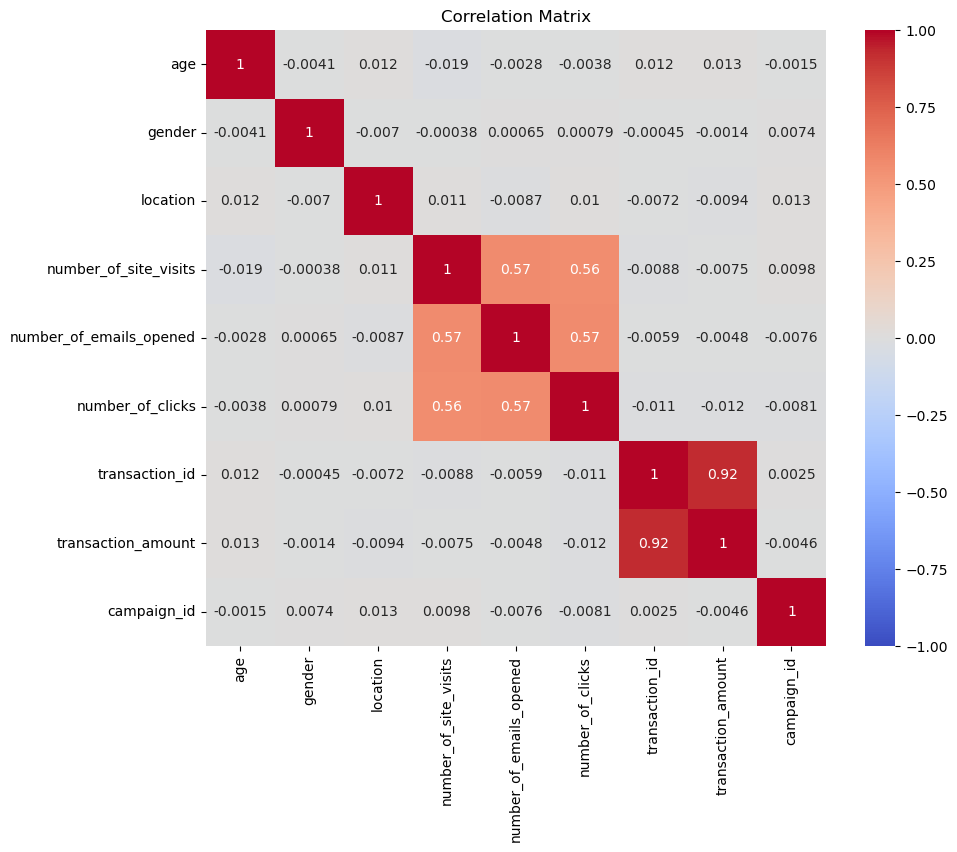

In [334]:
# Compute the correlation matrix
correlation_matrix = df1.drop(columns=['join_date','last_purchase_date','avg_purchase_per_transaction','customer_lifespan','customer_lifetime_value']).corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Modeling - using binary output

<Axes: xlabel='customer_lifetime_value', ylabel='Count'>

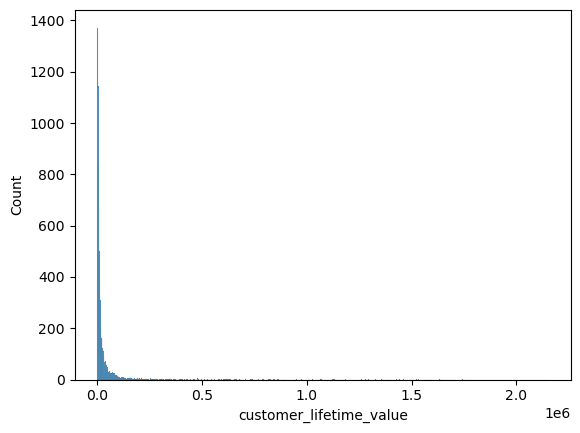

In [335]:
sns.histplot(df1['customer_lifetime_value'])

In [336]:
#as the customer staying longer with the company, they have the chance to have higher transactions
#so I classify the customer_lifetime based on the mean()
df1['customer_lifetime_value'].median()

8212.126315789474

In [337]:
df1['customer_lifetime_value'].mean()

39947.65052444057

In [338]:
#take the mean as proxy to split out put to 1 and 0
df1['binary_output'] = df1['customer_lifetime_value'].apply(lambda x: 1 if x>=8212 else 0)

C:\Users\User\AppData\Local\Temp\ipykernel_29260\957417837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['binary_output'] = df1['customer_lifetime_value'].apply(lambda x: 1 if x>=8212 else 0)


In [339]:
df1.groupby('binary_output')['customer_lifetime_value'].count()/len(df1)

binary_output
0    0.49995
1    0.50005
Name: customer_lifetime_value, dtype: float64

In [340]:
df1

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,avg_purchase_per_transaction,customer_lifespan,customer_lifetime_value,binary_output
customer_id,,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56,0,4747,10,15,1,6,3509.48,1.0,584.913333,0.32,10967.125000,1
2,2021-09-08,2023-10-25,43,1,2074,285,49,51,9,6081.32,2.0,675.702222,2.13,2855.079812,0
3,2021-06-01,2022-11-27,43,2,4613,192,73,25,6,1454.87,1.0,242.478333,1.49,976.422819,0
4,2022-01-01,2022-09-01,29,1,1916,110,30,17,20,7874.68,1.0,393.734000,0.67,11753.253731,1
5,2022-01-24,2023-06-02,43,1,1433,161,2,7,24,15524.55,0.0,646.856250,1.35,11499.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42,0,2384,119,47,16,10,5498.20,0.0,549.820000,0.66,8330.606061,1
9997,2022-07-09,2023-01-25,26,1,2315,3,33,14,12,5848.30,1.0,487.358333,0.55,10633.272727,1
9998,2023-09-17,2024-01-30,39,1,4017,53,17,5,3,3503.13,1.0,1167.710000,0.37,9467.918919,1


<Axes: xlabel='binary_output', ylabel='number_of_clicks'>

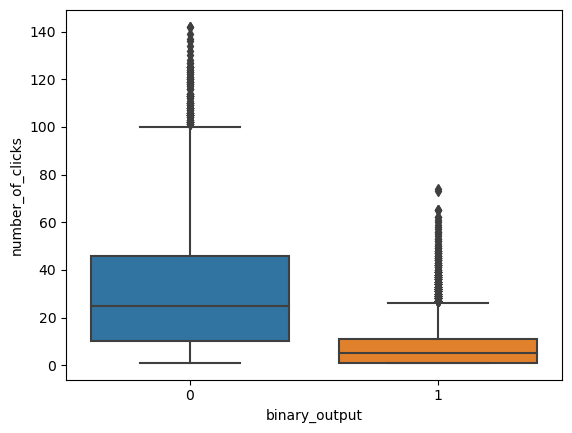

In [341]:
sns.boxplot(x='binary_output',y='number_of_clicks',data=df1)

<Axes: xlabel='binary_output', ylabel='transaction_amount'>

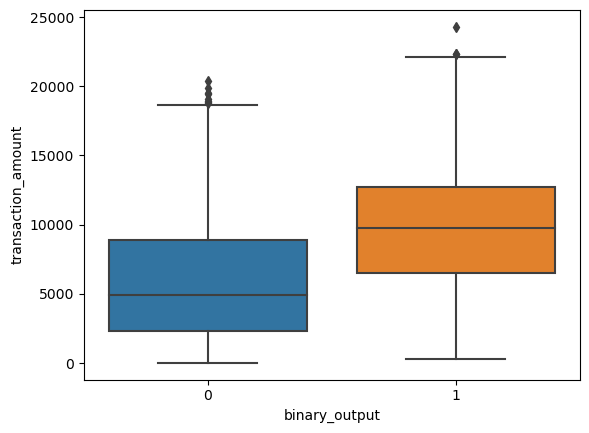

In [342]:
sns.boxplot(x='binary_output',y='transaction_amount',data=df1)

In [343]:
X = df1[['age','gender','location','number_of_site_visits','number_of_emails_opened','number_of_clicks','campaign_id',]]

y = df1['binary_output']

In [344]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1234)

In [346]:
#cross validation - divide dataset to 5 sections, train 4 sections and test 1 section, repeat the process 5 times
#quickly create 5 models and pick the best one

knn = KNeighborsClassifier()
log = LogisticRegression()


scores_log = cross_val_score(log, X_train, y_train, scoring='f1', cv=5)
scores_knn = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [347]:
print(f'Cross-Validated Scores for Logistic Regression:{scores_log}')
print(f'Cross-Validated Scores for K Nearest Neighbor:{scores_knn}')

Cross-Validated Scores for Logistic Regression:[0.79946164 0.80027454 0.80189959 0.78515346 0.79043601]
Cross-Validated Scores for K Nearest Neighbor:[0.77777778 0.77445652 0.7739772  0.76437588 0.774983  ]


In [348]:
#calculate average score
print(np.mean(scores_log))
print(np.mean(scores_knn))

0.7954450478188899
0.7731140754731648


In [349]:
#building an actual model
logreg = log.fit(X_train, y_train)
KNN = knn.fit(X_train, y_train)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [350]:
y_pred_log=logreg.predict(X_test)
y_pred_knn=KNN.predict(X_test)

In [351]:
from sklearn.metrics import accuracy_score

#logreg score
print(accuracy_score(y_test,y_pred_log))
print(precision_score(y_test,y_pred_log))
print(f1_score(y_test,y_pred_log))


0.8077956989247311
0.7937619350732018
0.8134377038486628


In [352]:
#knn score
print(accuracy_score(y_test,y_pred_knn))
print(precision_score(y_test,y_pred_knn))
print(f1_score(y_test,y_pred_knn))

0.770497311827957
0.7521739130434782
0.7800322061191628


<Figure size 1000x500 with 0 Axes>

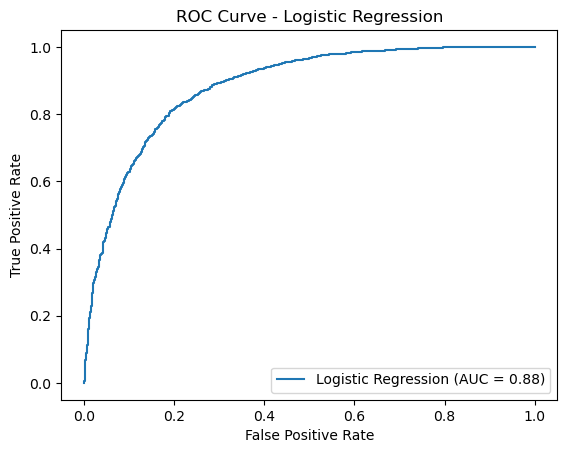

<Figure size 1000x500 with 0 Axes>

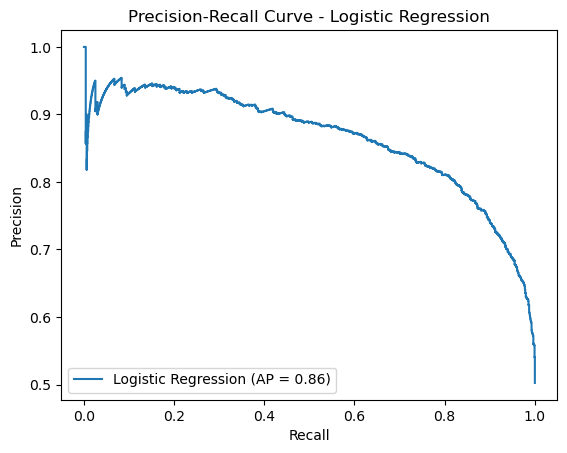

In [353]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Plot ROC and Precision-Recall curves for Logistic Regression
probs_log = logreg.predict_proba(X_test)
fpr_log, tpr_log, _ = roc_curve(y_test, probs_log[:, 1])
precision_log, recall_log, _ = precision_recall_curve(y_test, probs_log[:, 1])
roc_auc_log = roc_auc_score(y_test, probs_log[:, 1])
pr_auc_log = auc(recall_log, precision_log)

plt.figure(figsize=(10, 5))
RocCurveDisplay(fpr=fpr_log, tpr=tpr_log, roc_auc=roc_auc_log, estimator_name='Logistic Regression').plot()
plt.title('ROC Curve - Logistic Regression')
plt.show()

plt.figure(figsize=(10, 5))
PrecisionRecallDisplay(precision=precision_log, recall=recall_log, average_precision=pr_auc_log, estimator_name='Logistic Regression').plot()
plt.title('Precision-Recall Curve - Logistic Regression')
plt.show()


<Figure size 1000x500 with 0 Axes>

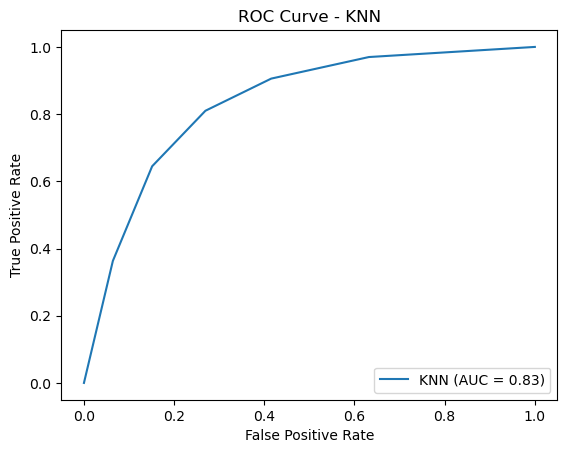

<Figure size 1000x500 with 0 Axes>

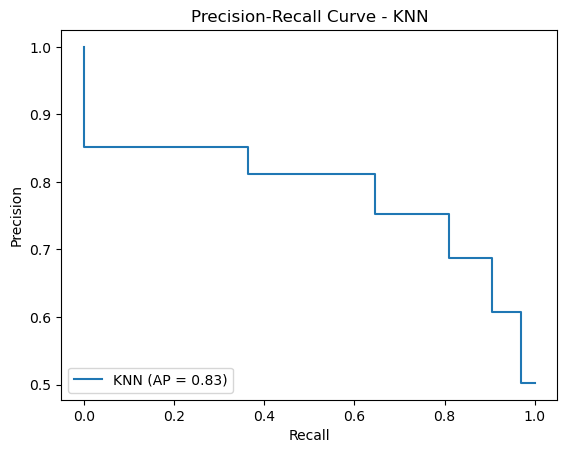

In [354]:
# Plot ROC and Precision-Recall curves for KNN
probs_knn = KNN.predict_proba(X_test)
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn[:, 1])
precision_knn, recall_knn, _ = precision_recall_curve(y_test, probs_knn[:, 1])
roc_auc_knn = roc_auc_score(y_test, probs_knn[:, 1])
pr_auc_knn = auc(recall_knn, precision_knn)

plt.figure(figsize=(10, 5))
RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=roc_auc_knn, estimator_name='KNN').plot()
plt.title('ROC Curve - KNN')
plt.show()

plt.figure(figsize=(10, 5))
PrecisionRecallDisplay(precision=precision_knn, recall=recall_knn, average_precision=pr_auc_knn, estimator_name='KNN').plot()
plt.title('Precision-Recall Curve - KNN')
plt.show()

By compare the two models between Logistic Regression and KNN, the Logistic Regression Model perform better

In [357]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Logistic Regression hyperparameter tuning
lr = LogisticRegression()
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

# KNN hyperparameter tuning
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='roc_auc')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [358]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Evaluate Logistic Regression
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# Evaluate KNN
y_pred_knn = best_knn.predict(X_test)
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

# Cross-validation scores
cv_scores_lr = cross_val_score(best_lr, X_scaled, y, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(best_knn, X_scaled, y, cv=5, scoring='roc_auc')


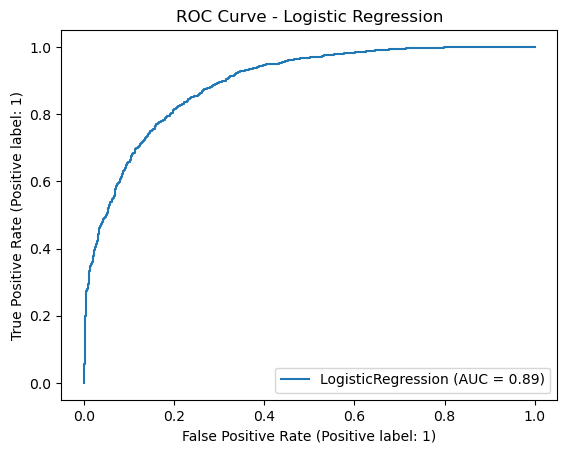

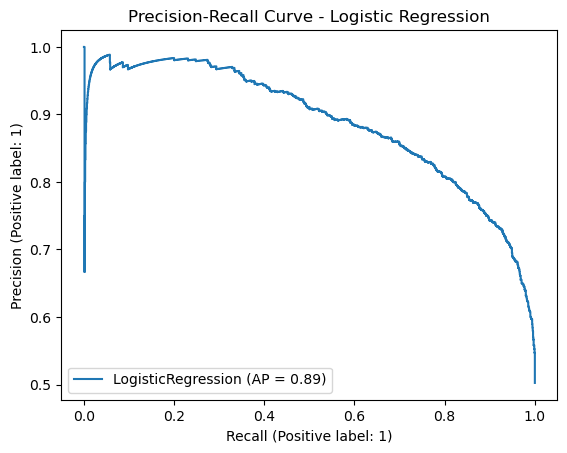

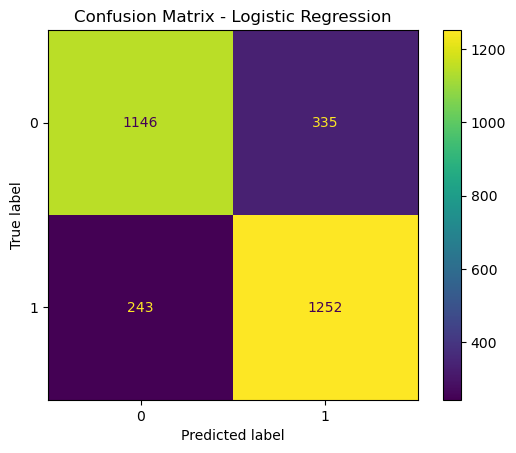

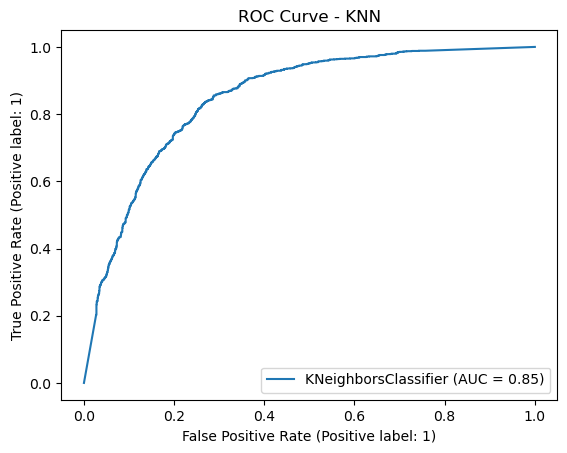

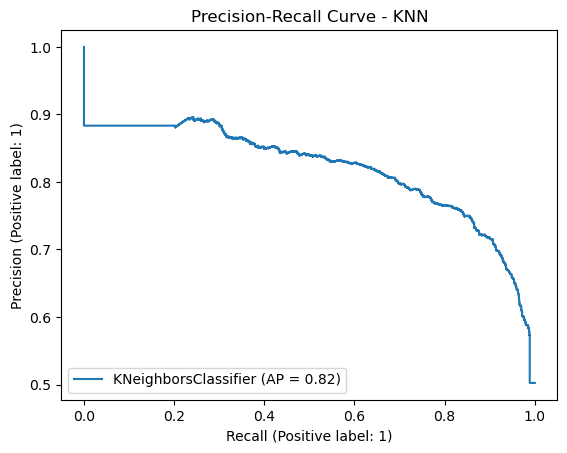

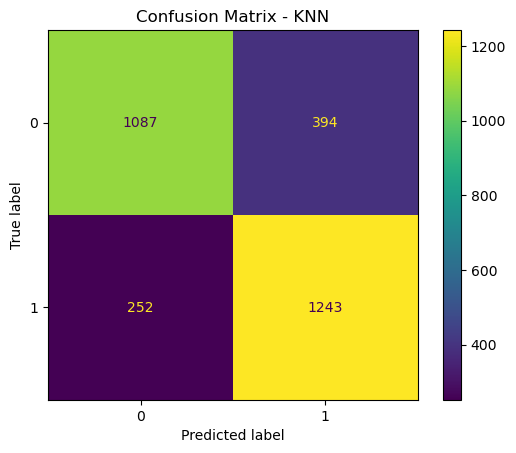

In [359]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, confusion_matrix, ConfusionMatrixDisplay

# ROC Curve for Logistic Regression
RocCurveDisplay.from_estimator(best_lr, X_test, y_test)
plt.title('ROC Curve - Logistic Regression')
plt.show()

# Precision-Recall Curve for Logistic Regression
PrecisionRecallDisplay.from_estimator(best_lr, X_test, y_test)
plt.title('Precision-Recall Curve - Logistic Regression')
plt.show()

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC Curve for KNN
RocCurveDisplay.from_estimator(best_knn, X_test, y_test)
plt.title('ROC Curve - KNN')
plt.show()

# Precision-Recall Curve for KNN
PrecisionRecallDisplay.from_estimator(best_knn, X_test, y_test)
plt.title('Precision-Recall Curve - KNN')
plt.show()

# Confusion Matrix for KNN
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test)
plt.title('Confusion Matrix - KNN')
plt.show()
